**Section 2 学習率最適化手法**

In [20]:
cd C:\Users\zawaz\Desktop\study_ai_ml_google\DNN_code_colab_lesson_1_2

C:\Users\zawaz\Desktop\study_ai_ml_google\DNN_code_colab_lesson_1_2


In [3]:
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
from collections import OrderedDict
from common import layers
from data.mnist import load_mnist
import matplotlib.pyplot as plt
from lesson_2.multi_layer_net import MultiLayerNet

SGD

データ読み込み完了


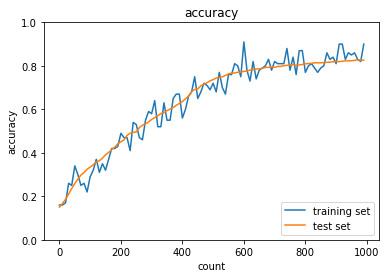

In [4]:
# データの読み込み
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True, one_hot_label=True)

print("データ読み込み完了")

# batch_normalizationの設定 ================================
# use_batchnorm = True
use_batchnorm = False
# ====================================================


network = MultiLayerNet(input_size=784, hidden_size_list=[40, 20], output_size=10, activation='relu', weight_init_std='he',
                       use_batchnorm=use_batchnorm)

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.005

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    # 勾配
    grad = network.gradient(x_batch, d_batch)
    
    for key in ('W1', 'W2', 'W3', 'b1', 'b2', 'b3'):
        network.params[key] -= learning_rate * grad[key]
        
        loss = network.loss(x_batch, d_batch)
        train_loss_list.append(loss)
    
    
    if (i + 1) % plot_interval == 0:
        accr_test = network.accuracy(x_test, d_test)
        accuracies_test.append(accr_test)        
        accr_train = network.accuracy(x_batch, d_batch)
        accuracies_train.append(accr_train)
        
#         print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
#         print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))

        
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

Momentum

データ読み込み完了


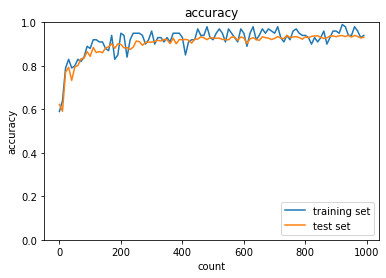

In [16]:
# データの読み込み
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True, one_hot_label=True)

print("データ読み込み完了")

# batch_normalizationの設定 ================================
# use_batchnorm = True
use_batchnorm = False
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[40, 20], output_size=10, activation='relu', weight_init_std='he',
                       use_batchnorm=use_batchnorm)

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.2
# 慣性
momentum = 0.9

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    # 勾配
    grad = network.gradient(x_batch, d_batch)
    if i == 0:
        v = {}
    for key in ('W1', 'W2', 'W3', 'b1', 'b2', 'b3'):
        if i == 0:
            v[key] = np.zeros_like(network.params[key])
        v[key] = momentum * v[key] - learning_rate * grad[key]
        network.params[key] += v[key]

        loss = network.loss(x_batch, d_batch)
        train_loss_list.append(loss)
        
    if (i + 1) % plot_interval == 0:
        accr_test = network.accuracy(x_test, d_test)
        accuracies_test.append(accr_test)        
        accr_train = network.accuracy(x_batch, d_batch)
        accuracies_train.append(accr_train)

#         print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
#         print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))
        
        
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

AdaGrad

データ読み込み完了


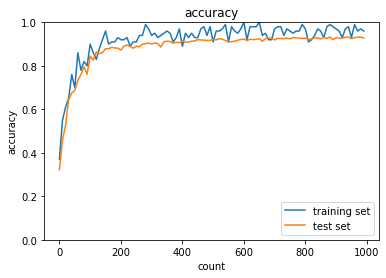

In [14]:
# データの読み込み
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True, one_hot_label=True)

print("データ読み込み完了")

# batch_normalizationの設定 ================================
# use_batchnorm = True
use_batchnorm = False
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[40, 20], output_size=10, activation='relu', weight_init_std='he',
                       use_batchnorm=use_batchnorm)

iters_num = 1000
# iters_num = 500 # 処理を短縮

train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.2

# AdaGradでは不必要
# =============================

theta = 1e-4

# =============================

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    # 勾配
    grad = network.gradient(x_batch, d_batch)
    if i == 0:
        h = {}
    for key in ('W1', 'W2', 'W3', 'b1', 'b2', 'b3'):
            
        # 変更しよう  
        # ===========================================
        if i == 0:
            h[key] = np.ones_like(network.params[key])*theta      
        h[key] = h[key] + grad[key]**2
        network.params[key] -= learning_rate * grad[key]/(theta+h[key]**0.5)

        # ===========================================
        
        loss = network.loss(x_batch, d_batch)
        train_loss_list.append(loss)
        
    if (i + 1) % plot_interval == 0:
        accr_test = network.accuracy(x_test, d_test)
        accuracies_test.append(accr_test)        
        accr_train = network.accuracy(x_batch, d_batch)
        accuracies_train.append(accr_train)

#         print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
#         print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))
        
        
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

RMSprop

データ読み込み完了


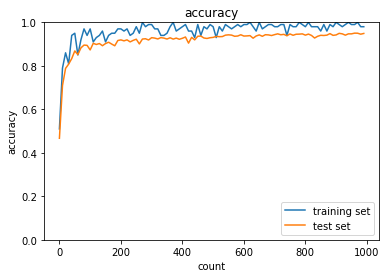

In [7]:
# データの読み込み
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True, one_hot_label=True)

print("データ読み込み完了")

# batch_normalizationの設定 ================================
# use_batchnorm = True
use_batchnorm = False
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[40, 20], output_size=10, activation='relu', weight_init_std='he',
                       use_batchnorm=use_batchnorm)

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.005
decay_rate = 0.99

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    # 勾配
    grad = network.gradient(x_batch, d_batch)
    if i == 0:
        h = {}
    for key in ('W1', 'W2', 'W3', 'b1', 'b2', 'b3'):
        if i == 0:
            h[key] = np.zeros_like(network.params[key])
        h[key] *= decay_rate
        h[key] += (1 - decay_rate) * np.square(grad[key])
        network.params[key] -= learning_rate * grad[key] / (np.sqrt(h[key]) + 1e-7)

        loss = network.loss(x_batch, d_batch)
        train_loss_list.append(loss)                
        
    if (i + 1) % plot_interval == 0:
        accr_test = network.accuracy(x_test, d_test)
        accuracies_test.append(accr_test)        
        accr_train = network.accuracy(x_batch, d_batch)
        accuracies_train.append(accr_train)
        
#         print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
#         print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))
        
        
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

Adam

データ読み込み完了


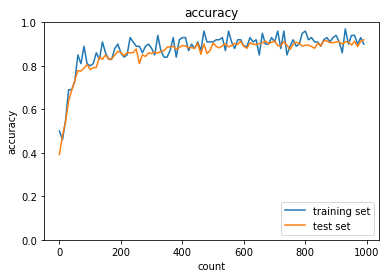

In [19]:
# データの読み込み
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True, one_hot_label=True)

print("データ読み込み完了")

# batch_normalizationの設定 ================================
# use_batchnorm = True
use_batchnorm = False
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[40, 20], output_size=10, activation='relu', weight_init_std='he',
                       use_batchnorm=use_batchnorm)

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.05
beta1 = 0.9
beta2 = 0.999

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    # 勾配
    grad = network.gradient(x_batch, d_batch)
    if i == 0:
        m = {}
        v = {}
    learning_rate_t  = learning_rate * np.sqrt(1.0 - beta2 ** (i + 1)) / (1.0 - beta1 ** (i + 1))    
    for key in ('W1', 'W2', 'W3', 'b1', 'b2', 'b3'):
        if i == 0:
            m[key] = np.zeros_like(network.params[key])
            v[key] = np.zeros_like(network.params[key])
            
        m[key] += (1 - beta1) * (grad[key] - m[key])
        v[key] += (1 - beta2) * (grad[key] ** 2 - v[key])            
        network.params[key] -= learning_rate_t * m[key] / (np.sqrt(v[key]) + 1e-7)                
        
        
    if (i + 1) % plot_interval == 0:
        accr_test = network.accuracy(x_test, d_test)
        accuracies_test.append(accr_test)        
        accr_train = network.accuracy(x_batch, d_batch)
        accuracies_train.append(accr_train)
        loss = network.loss(x_batch, d_batch)
        train_loss_list.append(loss)        
        
#         print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
#         print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))
                

lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

様々な最適化手法の比較を行った。残念ながら、今回の試行だけで最適化手法のとくちょうについて授業通りの確認をできたとは言いずらい部分がある。  
少なくともいえるのは、学習率一定の場合より、どの手法も短い時間で収束に向かう傾向が見られた。また、AdaGrad系は、収束に近づくにつれてやや落ち着いてくるように見えなくもない。  
いずれにせよ、初期の重みなどもランダムで振ってしまっているので、しっかり比較する場合は面倒だが、初期値もそろえる必要があると思った。